# **Simulazioni N-body**
Notebook realizzato per gli Stage Estivi a Fisica presso l'Università di Ferrara e curato dai seguenti dottorandi: Stefano Arcari, Nicola Barbieri, Nicolò Raffuzzi (primo anno), Marco Bortolami (secondo anno), Shahbaz Alvi, Luca Caloni, Serena Giardiello (terzo anno).

#Introduzione
Come sarebbe vivere in un altro Universo? Cosa vedremmo? Come funzionerebbe tutto quanto con leggi della Fisica diverse da quelle dell'Universo in cui viviamo?

È possibile rispondere a queste domande grazie all'aiuto delle **simulazioni**. Si può scrivere un programma, ad esempio usando il linguaggio di programmazione Python, che descrive il comportamento di un sistema fisico con le caratteristiche che vogliamo noi.

Ad esempio, possiamo simulare la caduta di un sasso con una gravità diversa dalla nostra. Oppure, possiamo studiare come si comporterebbe il Sistema Solare se non ci fosse Giove. Potremmo anche cercare di capire come sarebbe tutto l'Universo oggi se si fosse evoluto in modo diverso!!!

Durante questa attività impareremo a creare delle simulazioni in Python e ne visualizzeremo il risultato. Inizieremo con il moto di un corpo, per poi passare a 2 e a molti corpi che interagiscono con la forza di gravità. Infine, andremo a visualizzare il risultato di una simulazione con tantissimi corpi realizzata da fisici esperti che hanno simulato l'evoluzione dell'Universo in svariate condizioni.

---
Iniziamo col caricare i moduli necessari per questa esperienza.

In [ ]:
import numpy as np                  # modulo che fornisce le funzioni matematiche
import matplotlib.pyplot as plt     # modulo che permette di produrre grafici
from IPython.display import HTML    # modulo che permette a Python di visualizzare le simulazioni come brevi video
from matplotlib import animation    # modulo per produrre grafici animati, ovvero che cambiano col tempo

# Punto fermo

Ricordiamo il buon vecchio principio d'inerzia, o primo principio di Newton: "Un corpo che non è soggetto a forze (o in generale se la risultante delle forze è nulla) rimane in uno stato di quiete o continua a muoversi di moto rettilineo uniforme".

Proviamo a creare la più semplice simulazione possibile: un punto che rimane fermo dov'è man mano che il tempo passa. La semplicità di questo sistema ci permette di concentrarci sulle istruzioni per creare i grafici ed i video, che verranno ripetute in modo pressoché identico per le altre simulazioni. Iniziamo con la creazone di una figura vuota.

In [ ]:
# Queste righe di codice servono a creare una figura vuota, dalle dimensioni prestabilite (5x5 pollici),
# su cui verrà successivamente visualizzata l'immagine prodotta dal codice. Per farlo utilizziamo la funzione 
# figure del modulo matplotlib.pyplot (o, come lo abbiamo chiamato noi, plt).
# "ax" rappresenta il grafico dove andremo a mostrare la simulazione. Essa è composta da molteplici immagini,
# rappresentanti la situazione a diversi istanti di tempo, che vengono mostrare una dopo l'altra molto velocemente
# per dare l'impressione del movimento.
# D'ora in avanti, quando scriveremo "ax.qualcosa", staremo richiamando la funzione "qualcosa" dell'oggetto "ax"

fig = plt.figure(figsize=(5,5))
ax  = plt.subplot()

ax.set_xlim((0, 10))   # chiediamo di impostare 0 e 10 come valore minimo e massimo dell'asse x
ax.set_ylim((0, 10))   # chiediamo di impostare 0 e 10 come valore minimo e massimo dell'asse y
ax.set_xlabel('x')     # chiediamo di impostare la dicitura 'x' come etichetta dell'asse x
ax.set_ylabel('y')     # chiediamo di impostare la dicitura 'y' come etichetta dell'asse y

# Creiamo una serie di oggetti (sono dei grafici) che rappresentano, ciascuno, un corpo presente nella simulazione ad ogni istante di tempo.
# Per simulare un punto fermo ci serve solo un oggetto, che chiamiamo pt e che creiamo con la funzione plot. Questa funzione
# ci permette di disegnare il corpo alle coordinate desiderate e con le caratteristiche che vogliamo.
# Scegliamo che, per ora, le coordinate x (primo elemento dentro la parentesi) e y (secondo elemento dentro la parentesi)
# siano vuote: la dicitura [] mostrata sia per le x che per le y indica una lista vuota. Questa verrà successivamente riempita
# con le coordinate effettive del corpo presente nella nostra simulazione, ad ogni istante di tempo

pt, = ax.plot([], [], 'b.', ms=20)   # 'b.' imposta la visualizzazione dei corpi sotto forma di pallini blu
                                     # ms sta per "marker size", ovvero la dimensione del tratto, che scegliamo essere 20
                                     
# Chiudiamo il grafico perchè ora vedremmo solo delle immagini vuote non avendo ancora inserito i dati
plt.close()

Ora vediamo il cuore della simulazione: la funzione disegnaframe.

In [ ]:
# Questa è la funzione che calcola la posizione del punto ad un dato istante di tempo t.
# Queste informazioni vengono passate all'oggetto pt precedentemente creato in modo che il punto si sposti a quelle coordinate.
# La simulazione non fa altro che richiamare questa funzione per diversi istanti di tempo (diversi t) e aggiornare il grafico
# con la nuova posizione del punto

def disegnaframe(t):
    # posizione di partenza
    x0 = 5 #metri (m)
    y0 = 5 #metri (m)

    # ad ogni istante di tempo il punto rimane nella posizione x = 5 e y = 5, ovvero non si muove
    x = x0
    y = y0

    # assegniamo all'oggetto pt (rappresentante il grafico che visualizza il punto) l'attuale posizione del punto,
    # quindi la sua coordinata x e la sua coordinata y
    pt.set_data(x, y)

    # chiediamo di scrivere come titolo del grafico il valore dell'istante di tempo t a cui stiamo calcolando la posizione del punto
    ax.set_title('Tempo = %.2f s'%(t))

In [ ]:
# Utilizziamo la funzione FuncAnimation del modulo matplotlib.animation per creare la nostra simulazione, data
# da una successione di immagini create, ciascuna, dalla funzione disegnaframe per diversi istanti di tempo t.
# Utilizziamo 100 diversi istanti di tempo successivi (frames=100) e mostriamo la figura per ciascun
# istante di tempo successivo dopo un certo intervallo di tempo (interval=20 millisecondi)

anim = animation.FuncAnimation(fig, disegnaframe, frames=100, interval=20)

In [ ]:
# Utilizziamo il modulo HTML per convertire la nostra simulazione (chiamata precedentemente anim) in un video che visualizziamo!
# Come ci aspettavamo il punto rimane fermo man mano che il tempo passa

HTML(anim.to_html5_video())

# Punto in moto uniforme

Proviamo ora a movimentare un po' la situazione!!! Diamo una velocità (costante) al nostro corpo, rappresentato dal punto blu.

Ricordiamo che la legge oraria di un punto in moto uniforme è:
\begin{equation*} 
\mathbf{s}=\mathbf{s_{0}}+\mathbf{v_{0}}\left(t-t_{0}\right)
\end{equation*}

Le quantità in grassetto sono dei vettori, quindi calcoliamo separatamente la x e la y del punto. Inoltre, sceglieremo sempre $t_0=0$ per semplicità.

In [ ]:
# Come nella parte pecedente creiamo l'insieme di figure vuote, su cui visualizzare la nostra simulazione
fig = plt.figure(figsize=(5,5))
ax = plt.subplot()

# impostiamo i limiti dell'asse x e y e definiamo le loro etichette
ax.set_xlim((0, 10))
ax.set_ylim((0, 10))
ax.set_xlabel('x')
ax.set_ylabel('y')

# creiamo l'insieme di grafici che prenderanno in input la posizione del punto, simulato ad ogni istante di tempo
# all'interno della funzione disegnaframe sotto riportata
pt, = ax.plot([], [], 'b.', ms=20)
plt.close()

<font color='red'>**Esercizio 1**</font>
Prova a scegliere i valori della posizione iniziale (x0 e y0) e della velocità (vx e vy). Ricorda che, mostrando gli assi tra 0 e 10, la posizione iniziale deve essere all'interno del grafico. Inoltre, il tempo passa molto velocemente nella nostra simulazione (passa 1 secondo nella simulazione ogni 20 millisecondi nella realtà), quindi usa velocità basse, come 0.01 m/s.

In [ ]:
# Come nella sezione "Punto Fermo" questa funzione contiene le informazioni sulla posizione del punto ad ogni istante di tempo
def disegnaframe(t):
    # scrivi qui sotto i valori da te scelti
    x0 = 
    y0 = 
    vx = 
    vy = 
    
    # aggiorniamo la posizione del punto ad ogni istante di tempo t con la formula del moto rettilineo uniforme
    x = x0 + vx * t
    y = y0 + vy * t
    
    # assegniamo la nuova posizione al nostro grafico e scriviamo l'istante di tempo corrispondente come titolo dello stesso
    pt.set_data(x, y)
    ax.set_title('Tempo = %.2f s'%(t))

In [ ]:
#@title
# Come nella sezione "Punto Fermo" questa funzione contiene le informazioni sulla posizione del punto ad ogni istante di tempo
def disegnaframe(t):
    # questa volta il punto parte dalla posizione x0 = y0 = 5 ma si muove lungo la direzione x
    # con velocità vx = 0.05, mentre non ha velocità lungo l'asse y
    x0 = 5     #m
    y0 = 5     #m
    vx = 0.05  #m/s
    vy = 0     #m/s
    
    # aggiorniamo la posizione del punto ad ogni istante di tempo t con la formula del moto rettilineo uniforme
    x = x0 + vx * t
    y = y0 + vy * t
    
    # assegniamo la nuova posizione al nostro grafico e scriviamo l'istante di tempo corrispondente come titolo
    pt.set_data(x, y)
    ax.set_title('Tempo = %.2f s'%(t))

In [ ]:
# lanciamo la simulazione come nella sezione "Punto Fermo"
anim = animation.FuncAnimation(fig, disegnaframe, frames=100, interval=20)

In [ ]:
# e visualizziamo il risultato. Il punto si muove come ci aspettavamo?
HTML(anim.to_html5_video())

Come detto prima, se la risultante delle forze applicate ad un punto è nulla allora il punto si muove uniformemente (a velocità costante).
<font color='red'>**Domanda 1**</font> Se un punto si muove uniformemente ma la sua traiettoria stavolta è una circonferenza, cosa possiamo dire sulla risultante delle forze? È nulla o no? Potremmo simulare un moto circolare uniforme senza usare l'accelerazione?

# Punto in moto accelerato, forza costante

Introduciamo ora le forze e quindi l'accelerazione.

La legge oraria di un punto che si muove con accelerazione costante è: 
\begin{equation*} 
\mathbf{s}=\mathbf{s_{0}}+\mathbf{v_{0}}\left(t-t_{0}\right)+\frac{1}{2} \mathbf{a}\left(t-t_{0}\right)^{2}
\end{equation*} 
 
La velocità con cui si muove perciò è: 
\begin{equation*} 
\mathbf{v}=\mathbf{v_{0}}+\mathbf{a}\left(t-t_{0}\right)
\end{equation*}

Dato un corpo dotato di massa l'accelerazione che percepisce a causa di una forza costante è data dalla seconda legge di Newton:
\begin{equation}
\mathbf{a} = \frac{\mathbf{F}}{m}
\end{equation}

<font color='red'>**Esercizio 2**</font> Sotto troverai alcune parti di codice con un commento come questo: `### COMPLETA QUI ###`. Completa le parti mancanti in modo da far funzionare il codice.

In [ ]:
# Come nelle sezioni pecedenti creiamo l'insieme di figure vuote, su cui visualizzare la nostra simulazione
fig = plt.figure(figsize=(5,5))
ax = plt.subplot()

# impostiamo i limiti dell'asse x e y e definiamo le loro etichette
ax.set_xlim((0, 10))
ax.set_ylim((0, 10))
ax.set_xlabel('x')
ax.set_ylabel('y')

# creiamo l'insieme di grafici che prenderanno in input la posizione del punto, simulato ad ogni istante di tempo
# all'interno della funzione disegnaframe sotto riportata
pt, = ax.plot([], [], 'b.', ms=20) 
plt.close()

In [ ]:
# Come nelle sezioni precedenti definiamo la funzione che contiene le informazioni sulla posizione del punto ad ogni istante di tempo

def disegnaframe(t):
    # questa volta facciamo partire il punto dalla posizione x0 = 0, y0 = 5, applicandogli una forza costante lungo x
    # che lo farà muovere di moto uniformemente accelerato lungo l'asse x. Scegliamo che l'oggetto sia inizialmente fermo
    x0  = 0      #m
    y0  = 5      #m
    v0x = 0.005  #m/s
    v0y = 0      #m/s
    m   = 1      #kg
    Fx  = 0.005  #N
    Fy  = 0      #N

    # Per esercizio 2 (vedi sotto)
    #x0  =   #m
    #y0  =   #m
    #v0x =   #m/s
    #v0y =   #m/s
    #m   =   #kg
    #Fx  =   #N
    #Fy  =   #N

    # Per esercizio 3 (vedi sotto)
    #x0  =   #m
    #y0  =   #m
    #v0x =   #m/s
    #v0y =   #m/s
    #m   =   #kg
    #Fx  =   #N
    #Fy  =   #N
     
    # definiamo le accelerazioni lungo la direzione x ed y partendo dalla relativa forza applicata lungo la stessa direzione,
    # utilizzando la seconda legge di Newton
    # aggiorniamo poi la posizione del punto ad ogni istante t attraverso la formula del moto accelerato uniforme

    # calcoliamo l'accelerazione lungo x ed y partendo dalla forza e dalla massa
    accx =    ### COMPLETA QUI ###  
    accy =    ### COMPLETA QUI ###
    # calcoliamo la coordinata x ed y del corpo ad ogni istante di tempo t utilizzando la legge del moto accelerato uniforme
    x =   ### COMPLETA QUI ###
    y =   ### COMPLETA QUI ###
    
    # assegniamo la nuova posizione al nostro grafico e scriviamo l'istante di tempo corrispondente come titolo
    pt.set_data(x, y)
    ax.set_title('Tempo = %.2f s'%(t))

In [ ]:
#@title
# Come nelle sezioni precedenti definiamo la funzione che contiene le informazioni sulla posizione del punto ad ogni istante di tempo

def disegnaframe(t):
    # questa volta facciamo partire il punto dalla posizione x0 = 0, y0 = 5, applicandogli una forza costante lungo x
    # che lo farà muovere di moto uniformemente accelerato lungo l'asse x. Scegliamo che l'oggetto sia inizialmente fermo
    x0  = 0      #m
    y0  = 5      #m
    v0x = 0.005  #m/s
    v0y = 0      #m/s
    m   = 1      #kg
    Fx  = 0.005  #N
    Fy  = 0      #N
     
    # definiamo le accelerazioni lungo la direzione x ed y partendo dalla relativa forza applicata lungo la stessa direzione,
    # utilizzando la seconda legge di Newton
    # aggiorniamo poi la posizione del punto ad ogni istante t attraverso la formula del moto accelerato uniforme
    accx = Fx/m
    accy = Fy/m
    x = x0 + v0x * t + 0.5 * accx * t**2
    y = y0 + v0y * t + 0.5 * accy * t**2
    
    # assegniamo la nuova posizione al nostro grafico e scriviamo l'istante di tempo corrispondente come titolo
    pt.set_data(x, y)
    ax.set_title('Tempo = %.2f s'%(t))

In [ ]:
# lanciamo la simulazione come nella sezioni precedenti
anim = animation.FuncAnimation(fig, disegnaframe, frames=100, interval=20)

In [ ]:
# e visualizziamo il risultato. Il punto accelera lungo la direzione x!!!
HTML(anim.to_html5_video())

<font color='red'>**Esercizio 3**</font>
Prova a simulare la caduta di un corpo inizialmente fermo. Come sarà direzionata la forza? Come puoi calcolarne il valore sulla Terra, dopo aver scelto il valore della massa?

*Suggerimento*: se il corpo va troppo veloce, prova a:
* cambiare gli intervalli degli assi (anziché tra 0 e 10 prova altri valori)
* far finta di essere su un altro pianeta, riducendo la forza di gravità
* cambiare l'intervallo di tempo della simulazione, impostato con il parametro ***frames*** della funzione FuncAnimation

Potrebbe aiutarti, invece, ridurre la massa?

<font color='red'>**Esercizio 4**</font>
Prova a simulare il moto dei proiettili. Immagina che ad $x_0=0$ e $y_0=8$ ci sia un cannone che spara verso destra.

# Due punti, forza gravitazionale

Prendiamo come esempio il sistema composto dalla Terra e dalla Luna: la Luna orbita attorno alla Terra, cioè si muove di moto uniformemente accelerato, ovvero è in caduta libera verso la Terra.

<font color='red'>**Domanda 2**</font> Perchè i due corpi non collidono?

**Risposta:** la perdita di quota della Luna è compensata dal fatto che la sua velocità tangenziale è sufficientemente alta da permetterle di rimanere in "quota". Quando lanciamo un sasso, questo ad un certo punto comincerà a cadere verso il suolo: immaginando di poterlo lanciare con velocità sempre più alte ci rendiamo conto che cadrà sempre più lontano... e se lo lanciamo con forza sufficiente avrà una velocità tale per cui la sua perdita di quota varia come la curvatura della Terra, cioè rimane in quota.<br>

L'equazione che regola l'attrazione gravitazionale tra due corpi è la legge delle gravitazione universale di Newton:
\begin{equation}
\mathbf{F}_{1,2}\left(\mathbf{r}\right)=-\frac{G\,m_{1} m_{2}}{r^{2}}\,\mathbf{u_r}
\end{equation}

dove $\mathbf{u_r}$ è un vettore di lunghezza 1 metro che indica la direzione della forza e $r$ è la distanza tra la massa 1 e la massa 2 e in 2D può essere calcolata attraverso le coordinate delle due masse:
\begin{equation}
r=\sqrt{(x_1-x_2)^2 + (y_1-y_2)^2}
\end{equation}

Riscriviamo la forza di gravità in modo diverso, cosicché sia più facile scriverla in Python. Moltiplichiamo sopra e sotto per il raggio $r$:
\begin{equation}
\mathbf{F}_{1,2}\left(\mathbf{r}\right)=-\frac{G\,m_{1} m_{2}}{r^{2}*r}\,\mathbf{u_r}*r=-\frac{G\,m_{1} m_{2}}{r^{3}}\,\mathbf{r}
\end{equation}

Ora $\mathbf{r}$ è un vettore lungo come la distanza tra le masse e che punta nella direzione della forza.

<font color='red'>**Esercizio 5**</font> Sotto troverai alcune parti di codice con un commento come questo: `### COMPLETA QUI ###`. Completa le parti mancanti in modo da far funzionare il codice.

**Passo 1:** Creiamo la solita figura vuota. Creiamo 2 oggetti pt dato che abbiamo 2 corpi.

In [ ]:
# Come nelle sezioni pecedenti creiamo l'insieme di figure vuote, su cui visualizzare la nostra simulazione
fig = plt.figure(figsize=(5,5))
ax = plt.subplot()

# impostiamo i limiti dell'asse x e y e definiamo le loro etichette
ax.set_xlim((0, 10))
ax.set_ylim((0, 10))
ax.set_xlabel('x')
ax.set_ylabel('y')

# Questa volta vogliamo simulare l'attrazione gravitazionale tra DUE corpi, quindi abbiamo 2 punti da visualizzare
# Creiamo dunque due oggetti diversi che chiamiamo pt1 e pt2
pt1, = ax.plot([], [], 'b.', ms=20)
pt2, = ### COMPLETA QUI ###
plt.close()

In [ ]:
#@title
# Come nelle sezioni pecedenti creiamo l'insieme di figure vuote, su cui visualizzare la nostra simulazione
fig = plt.figure(figsize=(5,5))
ax = plt.subplot()

# impostiamo i limiti dell'asse x e y e definiamo le loro etichette
ax.set_xlim((0, 10))
ax.set_ylim((0, 10))
ax.set_xlabel('x')
ax.set_ylabel('y')

# Questa volta vogliamo simulare l'attrazione gravitazionale tra DUE corpi, quindi abbiamo 2 punti da visualizzare
# Creiamo dunque due oggetti diversi che chiamiamo pt1 e pt2
pt1, = ax.plot([], [], 'b.', ms=20)     
pt2, = ax.plot([], [], 'b.', ms=20) 
plt.close()

**Passo 2:** Scriviamo una funzione che calcoli l'accelerazione usando la legge di Newton.

In [ ]:
# Per semplicità, mettiamo il calcolo dell'accelerazione in una funzone separata che chiamiamo getAcc
# Le varie quantità non saranno più numeri, ma vettori o matrici. Questo, nonostante sia concettualmente
# complicato, semplifica enormemente il codice che andremo a scrivere
# Ad esempio, mettiamo tutte le coordinate dentro una matrice che chiamiamo pos. Vediamo come è fatta:
#         0       1
#      ________________
#     |       |       |
#  0  |   x1  |   y1  |
#     |_______|_______|
#     |       |       |
#  1  |   x2  |   y2  |
#     |_______|_______|
#
# pos è una matrice che contiene le coordinate (x e y) della posizione delle due particelle:
#    pos[0,0] = x1 (coordinata x della prima particella) !!!ATTENZIONE!!! Python inizia sempre a contare da 0, quindi il primo elemento ha indice 0 e non 1
#    pos[0,1] = y1
#    pos[1,0] = x2
#    pos[1,1] = y2  
# quindi la riga 0 contiene la posizione della prima particella e la riga 1 della seconda
# invece la colonna 0 contiene tutte le x mentre la colonna 1 tutte le y
# E' complicato, ma è super comodo (altrimenti, dovremmo scrivere tantissime istruzioni in più, per niente)

def getAcc(pos):
    global mass           # definiamo il vettore per le masse come globale, cioè viene preso da fuori (mass[0] = m1, mass[1] = m2)

    N = pos.shape[0]      # salviamo il numero di righe di pos e quindi il numero di particelle (2 in questo caso)
    a = np.zeros((N,2))   # creiamo una matrice con N righe (come il numero di particelle) e 2 colonne (ax e ay)
                          # ciascuna riga conterrà l'accelerazione di una singola particella (è una matrice fatta come pos)
    G = 1.0               # assegniamo un valore alla costante di gravitazione universale 
                          # (!!NOTA!! non è quello reale ma un valore ideale per ottenere una bella animazione)

    softening = 0.1       # questo è un fattore che serve ad evitare divisioni per 0 quando le particelle sono molto vicine (vedere dentro ai cicli che seguono)

    # facciamo un ciclo su tutte le particelle (2 in questo caso) e per ciascuna calcoliamo l'accelerazione lungo le direzioni
    # x e y generata dalle altre particelle (1 in questo caso). Per farlo applichiamo la legge di Newton
    for i in range(N):
        # dobbiamo tenere a mente che ciascuna particella sente l'influenza di tutte le altre ma non di sé stessa
        # la dicitura np.delete(range(N), i) ci assicura che j sia diverso da i, perché elimina i dalla lista di valori
        for j in np.delete(range(N), i):
            dx = pos[j,0] - ### COMPLETA QUI ###   # calcoliamo la distanza tra le particelle lungo x
            dy =            ### COMPLETA QUI ###   # calcoliamo la distanza tra le particelle lungo y

            # calcoliamo l'inverso della distanza r tra le particelle al cubo
            # np.sqrt è la radice quadrata
            # **3 è l'elevazione al cubo
            # aggiungiamo un valore diverso da 0 alla distanza nella parentesi per evitare
            # di dividere per 0 quando le particelle sono sovrapposte (dx = dy = 0)
            # se ciò accadesse il codice darebbe errore e non sarebbe in grado di produrre la simulazione
            inv_r3 = 1/np.sqrt(dx**2 + dy**2 + softening**2)**3

            # sommiamo all'accelerazione totale della particella i quella della particella j
            a[i,0] +=  G * (dx * inv_r3) * mass[j];            
            a[i,1] +=  G * (dy * inv_r3) * mass[j];
            
    return a   # mandiamo in output l'accelerazione

In [ ]:
#@title
# Per semplicità, mettiamo il calcolo dell'accelerazione in una funzone separata che chiamiamo getAcc
# Le varie quantità non saranno più numeri, ma vettori o matrici. Questo, nonostante sia concettualmente
# complicato, semplifica enormemente il codice che andremo a scrivere
# Ad esempio, mettiamo tutte le coordinate dentro una matrice che chiamiamo pos. Vediamo come è fatta:
#         0       1
#      ________________
#     |       |       |
#  0  |   x1  |   y1  |
#     |_______|_______|
#     |       |       |
#  1  |   x2  |   y2  |
#     |_______|_______|
#
# pos è una matrice che contiene le coordinate (x e y) della posizione delle due particelle:
#    pos[0,0] = x1 (coordinata x della prima particella) !!!ATTENZIONE!!! Python inizia sempre a contare da 0, quindi il primo elemento ha indice 0 e non 1
#    pos[0,1] = y1
#    pos[1,0] = x2
#    pos[1,1] = y2  
# quindi la riga 0 contiene la posizione della prima particella e la riga 1 della seconda
# invece la colonna 0 contiene tutte le x mentre la colonna 1 tutte le y
# E' complicato, ma è super comodo (altrimenti, dovremmo scrivere tantissime istruzioni in più, per niente)

def getAcc(pos):
    global mass           # definiamo il vettore per le masse come globale, cioè viene preso da fuori (mass[0] = m1, mass[1] = m2)

    N = pos.shape[0]      # salviamo il numero di righe di pos e quindi il numero di particelle (2 in questo caso)
    a = np.zeros((N,2))   # creiamo una matrice con N righe (come il numero di particelle) e 2 colonne (ax e ay)
                          # ciascuna riga conterrà l'accelerazione di una singola particella (è una matrice fatta come pos)
    G = 1.0               # assegniamo un valore alla costante di gravitazione universale 
                          # (!!NOTA!! non è quello reale ma un valore ideale per ottenere una bella animazione)

    softening = 0.1       # questo è un fattore che serve ad evitare divisioni per 0 quando le particelle sono molto vicine (vedere dentro ai cicli che seguono)

    # facciamo un ciclo su tutte le particelle (2 in questo caso) e per ciascuna calcoliamo l'accelerazione lungo le direzioni
    # x e y generata dalle altre particelle (1 in questo caso). Per farlo applichiamo la legge di Newton
    for i in range(N):
        # dobbiamo tenere a mente che ciascuna particella sente l'influenza di tutte le altre ma non di se stessa
        # la dicitura np.delete(range(N), i) ci assicura che j sia diverso da i, perché elimina i dalla lista di valori
        for j in np.delete(range(N), i):
            dx = pos[j,0] - pos[i,0]   # calcoliamo la distanza tra le particelle lungo x
            dy = pos[j,1] - pos[i,1]   # calcoliamo la distanza tra le particelle lungo y

            # calcoliamo l'inverso della distanza r tra le particelle al cubo
            # np.sqrt è la radice quadrata
            # **3 è l'elevazione al cubo
            # aggiungiamo un valore diverso da 0 alla distanza nella parentesi per evitare
            # di dividere per 0 quando le particelle sono sovrapposte (dx = dy = 0)
            # se ciò accadesse il codice darebbe errore e non sarebbe in grado di produrre la simulazione
            inv_r3 = 1/np.sqrt(dx**2 + dy**2 + softening**2)**3

            # sommiamo all'accelerazione totale della particella i quella della particella j
            a[i,0] +=  G * (dx * inv_r3) * mass[j];            
            a[i,1] +=  G * (dy * inv_r3) * mass[j];
            
    return a   # mandiamo in output l'accelerazione

**Passo 3:** Diamo delle condizioni iniziali e calcoliamo l'accelerazione iniziale.

In [ ]:
# impostiamo il numero di particelle (questo codice funziona solo per due particelle poichè abbiamo solo 2 oggetti, pt1 e pt2)
# e l'intervallo di tempo che dice al codice ogni quanto aggiornare la posizione delle particelle
N  = 2    
dt = 0.01

# impostiamo le condizioni iniziali
mass = np.ones((N,1))*20.0/N         # le masse sono contenute in un vettore e hanno tutte lo stesso valore (20/2 = 10 kg)
pos  = np.random.normal(5,2,(N,2))   # assegniamo posizioni casuali alle 2 particelle
vel  = np.random.normal(0,1,(N,2))   # assegniamo velocità casuali alle due particelle
# np.ones crea una serie di 1 della dimensione che vogliamo. Noi ne vogliamo tanti quanti il numero di particelle, cioè N. Poi
# moltiplichiamo gli 1 per il valore delle masse (massa totale / numero particelle)
# np.random.normal(A,B,C) crea dei numeri casuali:
#     A è la media
#     B indica quanto i valori si possono allontanare da A (più è alto, più si discostano)
#     C è la dimensione del vettore o della matrice: (N,2) vuol dire che ha N righe e 2 colonne

# calcoliamo l'accelerazione sentita da ciascuna particella date le condizioni iniziali appena impostate
acc = getAcc(pos)

# Scriviamo i valori delle quantità sopra calcolate. Nota la dimensione di vettori e matrici
print("masse:")
print(mass)
print()

print("posizioni:")
print(pos)
print()

print("velocità:")
print(vel)
print()

print("accelerazioni:")
print(acc)

masse:
[[10.]
 [10.]]

posizioni:
[[3.79166913 3.49632978]
 [6.79460859 6.82131715]]

velocità:
[[ 0.42749122  0.55574506]
 [-1.35329983 -0.2156    ]]

accelerazioni:
[[ 0.33365501  0.36943758]
 [-0.33365501 -0.36943758]]


**Passo 4:** La nostra cara vecchia disegnaframe. Calcoliamo, ad ogni tempo t, l'accelerazione e la posizione delle particelle.

In [ ]:
def disegnaframe(t):
    # le posizioni, velocità, accelerazioni e il conteggio del tempo devono essere aggiornati ogni volta che questa funzione viene chiamata 
    # ed il nuovo valore deve essere salvato e accessibile anche fuori dalla funzione, per questo usiamo variabili globali, ovvero che valgono ovunque
    global pos
    global vel
    global acc
    global dt
    
    # Ora ci si presenta un problema:
    # per calcolare l'accelerazione ad un certo istante ci serve la posizione a quell'istante, ma
    # per calcolare la posizione ad un certo istante ci serve l'accelerazione a quell'istante!!!
    # Non possiamo calcolarle contemporaneamente... Come possiamo risolvere?

    # Ci sono diversi algoritmi che risolvono il problema in modi diversi. Uno di questi è il leapfrog, composto di 4 passi:
    # 1) aggiorno la velocità usando l'accelerazione non aggiornata per metà tempo
    vel += acc * dt/2.0

    # 2) aggiorno la posizione con la velocità appena calcolata
    pos += vel * dt

    # 3) ricalcolo l'accelerazione di ciascuna particella con la nuova posizione
    acc = getAcc(pos)

    # 4) aggiorno la velocità usando l'accelerazione aggiornata per un'altra metà di tempo
    vel += acc * dt/2.0

    # assegniamo le posizioni aggiornate ai due grafici (uno per ciascuna particella) e scriviamo l'istante di tempo corrispondente come titolo dell'immagine
    pt1.set_data()   ### COMPLETA QUI ###
    pt2.set_data()   ### COMPLETA QUI ###
    ax.set_title('Tempo = {0:4d} s'.format(t))

In [ ]:
#@title
def disegnaframe(t):
    # le posizioni, velocità, accelerazioni e il conteggio del tempo devono essere aggiornati ogni volta che questa funzione viene chiamata 
    # ed il nuovo valore deve essere salvato e accessibile anche fuori dalla funzione, per questo usiamo variabili globali, ovvero che valgono ovunque
    global pos
    global vel
    global acc
    global dt
    
    # Ora ci si presenta un problema:
    # per calcolare l'accelerazione ad un certo istante ci serve la posizione a quell'istante, ma
    # per calcolare la posizione ad un certo istante ci serve l'accelerazione a quell'istante!!!
    # Non possiamo calcolarle contemporaneamente... Come possiamo risolvere?

    # Ci sono diversi algoritmi che risolvono il problema in modi diversi. Uno di questi è il leapfrog, composto di 4 passi:
    # 1) aggiorno la velocità usando l'accelerazione non aggiornata per metà tempo
    vel += acc * dt/2.0

    # 2) aggiorno la posizione con la velocità appena calcolata
    pos += vel * dt

    # 3) ricalcolo l'accelerazione di ciascuna particella con la nuova posizione
    acc = getAcc(pos)

    # 4) aggiorno la velocità usando l'accelerazione aggiornata per un'altra metà di tempo
    vel += acc * dt/2.0

    # assegnamo le posizioni aggiornate ai due grafici (uno per ciascuna particella) e scriviamo l'istante di tempo corrispondente come titolo dell'immagine
    pt1.set_data(pos[0,0], pos[0,1])
    pt2.set_data(pos[1,0], pos[1,1])
    ax.set_title('Tempo = {0:4d} s'.format(t))

**Passo 5:** Costruiamo il video!!!

In [ ]:
# lanciamo la simulazione
anim = animation.FuncAnimation(fig, disegnaframe, frames=100, interval=20)

In [ ]:
# vedete come le particelle tendono ad attrarsi? Potrebbe essere difficile con due sole particelle, tra poco proveremo con un numero maggiore
HTML(anim.to_html5_video())

# N punti, forza gravitazionale

Ora entriamo nel vivo delle simulazioni N-body. Proviamo a simulare non 2, ma un certo numero di corpi che chiamiamo N. Questi corpi interagiscono grazie alla sola forza di gravità e hanno tutti la stessa massa.

In [ ]:
# Come nelle sezioni pecedenti creiamo l'insieme di figure vuote, su cui visualizzare la nostra simulazione
fig = plt.figure(figsize=(5,5))
ax = plt.subplot()

# è normale che, a differenza dei casi precedenti, qui non ci sia altro (vedi sotto)

plt.close()

In [ ]:
# La funzione getAcc calcola l'accelerazione lungo x e lungo y date le posizioni di tutte le particelle.
# La funzione è identica a qualla definita per sole 2  particelle, nella sezione precedente, con la differenza
# che la matrice pos avrà questa volta N righe, pari al numero di particelle scelto, che può essere diverso da 2

def getAcc(pos):
    global mass

    N = pos.shape[0]
    a = np.zeros((N,2))

    G = 1.0     

    softening = 0.1

    for i in range(N):
        for j in np.delete(range(N), i):
            dx = pos[j,0] - pos[i,0]
            dy = pos[j,1] - pos[i,1]
            inv_r3 = 1/np.sqrt(dx**2 + dy**2 + softening**2)**3

            a[i,0] +=  G * (dx * inv_r3) * mass[j]
            a[i,1] +=  G * (dy * inv_r3) * mass[j]
            
    return a

In [ ]:
# impostiamo l'intervallo di tempo tra un aggiornamento della posizione delle particelle e quello successivo
dt = 0.01
# decidiamo il numero di particelle che vogliamo nella simulazione
N = 10

# impostiamo le condizioni iniziali
mass = 20.0*np.ones((N,1))/N  
pos  = np.random.normal(5,2,(N,2))
vel  = np.random.normal(0,1,(N,2))

# calcoliamo l'accelerazione di ciascuna particella data la loro posizione iniziale appena impostata casualmente
acc = getAcc(pos)

In [ ]:
# Come nelle sezione precedente definiamo la funzione che contiene le informazioni sulla posizione del punto ad ogni istante di tempo;
# la posizione è aggiornata, di nuovo, utilizzando il metodo dell'half-kick
def disegnaframe(t):
    global pos
    global vel
    global acc
    global dt
    
    # calcoliamo la posizione aggiornata dopo mezzo-passo
    vel += acc * dt/2.0
    pos += vel * dt

    # aggiorniamo l'accelerazione delle particelle, date le nuove posizioni
    acc = getAcc(pos)

    # calcoliamo la velocità finale all'istante t dopo un altro mezzo-passo
    vel += acc * dt/2.0

    # abbiamo ora un numero N di particelle e per ciascuna di esse dobbiamo creare un oggetto che contenga il grafico 
    # della singola particella, data la sua posizione aggiornata all'istante t
    N = pos.shape[0]
    pts = []             # definiamo una lista di oggetti che conterranno i grafici con la posizione di ogni particella
    ax.clear()           # questo comando cancella qualsiasi grafico già esistente, cosa succede se lo togliamo?
    for i in range(N):
        pts.append(ax.plot(pos[i,0], pos[i,1], 'b.', ms=20)) # aggiungiamo alla lista un corpo alla volta con un ciclo

    # impostiamo i limiti degli assi, le loro etichette e il titolo con l'istante di tempo attuale
    # dobbiamo farlo dentro alla funzione disegnaframe, diversamente dai casi precedenti, perchè ad ogni
    # chiamata della funzione disegnaframe i settaggi del grafico ax vengono cancellati dal comando ax.clear()
    ax.set_xlim((0, 10))
    ax.set_ylim((0, 10))
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('Tempo = {0:4d} s'.format(t))

In [ ]:
# lanciamo la simulazione
anim = animation.FuncAnimation(fig, disegnaframe, frames=100, interval=20)

In [ ]:
# e finalmente abbiamo un sistema di N particelle che interagiscono gravitazionalmente, 
# ma cosa succede se 2 particelle arrivano molto vicino l'una all'altra?
HTML(anim.to_html5_video())

<font color='red'>**Esercizio 6**</font> Prova a modificare alcune cose e vedere cosa succede. Ad esempio, prova a:
* modificare il numero di particelle
* modificare il valore totale della massa (inizialmente 20 kg)
* impostare le velocità iniziali a zero
* generare le masse casualmente, in modo che abbiano valori diversi
* modificare la costante di gravità G. Ora abbiamo usato un valore non corretto perché, come avrai notato, oggetti di qualche kg non si mettono ad orbitare uno attorno all'altro! Sarebbe un po' difficile programmare in queste condizioni... Prova ad impostare G al valore corretto per il nostro Universo
* commentare l'istruzione `ax.clear()`

<font color='red'>**Domanda 3**</font> Se i pianeti avessero una carica elettrica diversa da zero, come dovremmo modificare la nostra simulazione per tenerne conto?

<font color='red'>**Domanda 4**</font> Cosa succederebbe se disponessimo i nostri N corpi equidistanti l'uni dagli altri? Tanto per capirci disponiamo i corpi a formare una griglia regolare. E se invece di avere N corpi disposti su una griglia regolare ne avessimo un numero infinito? Cosa succederebbe alla loro disposizione?

<figure>
<center>
<img src='https://drive.google.com/uc?id=15bBgCV0MW_fA9NUR0MxG4OOLkqgAdekO' width="300">
</center>
</figure>

# N punti, forza gravitazionale, merging

Ti sarà capitato di vedere alcuni corpi venire a contatto e non urtarsi. Se questi puntini che si muovono fossero delle stelle, di certo non si passerebbero attraverso senza qualche effetto disastroso. Quello che succede con alcuni corpi, come le stelle di neutroni e i buchi neri, è che si mettono a danzare uno attorno all'altro finché non si avvicinano tanto da unirsi in un corpo solo. Proviamo a simulare in modo molto semplice questo effetto, chiamato **merging** (o coalescenza). Aggiungiamo quindi una caratteristica alla nostra simulazione: se i corpi sono molto vicini (entro una certa soglia), si uniscono in un corpo con una massa uguale alla somma delle masse dei corpi che collidono.

In [ ]:
# Come nelle sezioni pecedenti creiamo l'insieme di figure vuote, su cui visualizzare la nostra simulazione
fig = plt.figure(figsize=(5,5))
ax = plt.subplot()

plt.close()

In [ ]:
# Definiamo nuovamente la funzione che calcola l'accelerazione di ciascuna delle N particelle, data la loro posizione. E' uguale a quella sopra.
def getAcc(pos):
    global mass

    N = pos.shape[0]
    a = np.zeros((N,2))

    G = 1.0     

    softening = 0.000001

    for i in range(N):
        for j in np.delete(range(N), i):
            dx = pos[j,0] - pos[i,0]
            dy = pos[j,1] - pos[i,1]
            inv_r3 = 1/np.sqrt(dx**2 + dy**2 + softening**2)**3

            a[i,0] +=  G * (dx * inv_r3) * mass[j]
            a[i,1] +=  G * (dy * inv_r3) * mass[j]
    
    return a

In [ ]:
# Adesso vogliamo inserire una funzione che faccia unire due particelle in un'unica particella (coalescenza) quando queste sono molto vicine.
# Questa funzione deve:
#     - eliminare una delle due particelle che si uniscono, ovvero eliminare la sua posizione, velocità, accelerazione e massa dalle rispettive matrici
#     - assegnare alla particella che rimane la somma delle masse delle due particelle che si uniscono, come nuovo valore di massa
def merge():
    global pos
    global vel
    global acc
    global mass
    
    N = pos.shape[0]   # il numero di particelle sarà sempre dato dalla dimensione (numero di righe) della matrice delle posizioni pos
                       # questo è fondamentale perchè questo numero diminuerà ogni volta che due particelle si uniscono
    soglia_r = 0.01    # impostiamo la soglia di coalescenza, ovvero la distanza tra 2 particelle necessaria affinchè si uniscano
    
    # cicliamo su ogni coppia di particelle, calcolandone la distanza e verificando se quest'ultima sia minore della soglia di coalescenza
    # se lo è segnamo l'indice corrispondente a una delle 2 particelle che si uniscono in una lista,
    # aggiorniamo la velocità della particella superstite attraverso la conservazione della quantità di moto
    # e le assegniamo la somma delle due masse come nuova massa
    merge_indices = []
    for i in range(N):
        for j in np.arange(i+1,N,1):
            dx = pos[j,0] - pos[i,0]
            dy = pos[j,1] - pos[i,1]
            if((dx**2 + dy**2) < soglia_r):
                merge_indices.append(i)
                vel[j,:] = (mass[j]*vel[j,:] + mass[i]*vel[i,:])/(mass[j] + mass[i])
                mass[j] += mass[i] 

    # ora che abbiamo una lista con gli indici corrispondenti a tutte le particelle da eliminare (merge_indices),
    # la usiamo per eliminare posizione, velocità, accelerazione e massa di tutte queste particelle dalle relative matrici o array
    pos  = np.delete(pos, merge_indices, axis=0)
    vel  = np.delete(vel, merge_indices, axis=0)
    acc  = np.delete(acc, merge_indices, axis=0)
    mass = np.delete(mass, merge_indices, axis=0)

In [ ]:
# impostiamo l'intervallo di tempo tra un aggiornamento della posizione delle particelle e quello successivo
dt = 0.01
# decidiamo il numero di particelle che vogliamo nella simulazione
N = 25

# impostiamo le condizioni iniziali
mass = np.ones((N,1))*20.0/N  
pos  = np.random.normal(5,2,(N,2))
vel  = np.random.normal(0.1,1,(N,2))
acc  = np.zeros((N,2))

mass0 = mass[0] # salviamo il valore della massa iniziale delle particelle, ci servirà per riscalare la grandezza delle particelle
merge()         # chiamiamo la funzione di coalescenza, che controlla se ci sono già particelle molto vicine tra loro ed in caso affermativo le unisce

# calcoliamo l'accelerazione iniziale delle particelle sopravvissute
acc = getAcc(pos)

In [ ]:
# Come nelle sezione precedente definiamo la funzione che contiene le informazioni sulla posizione del punto ad ogni istante di tempo;
# la posizione è aggiornata utilizzando il metodo dell'half-kick (o leapfrog)
def disegnaframe(t):
    global pos
    global vel
    global acc
    global dt
    
    # calcoliamo la posizione aggiornata dopo mezzo-passo
    vel += acc * dt/2.0
    pos += vel * dt
    
    # controlliamo se, date le nuove posizioni, ci sono particelle da unire e se si le uniamo
    merge()

    # aggiorniamo l'accelerazione delle particelle
    acc = getAcc(pos)

    # calcoliamo la velocità finale all'istante t dopo un altro mezzo-passo
    vel += acc * dt/2.0

    # come nella sezione precedente assegniamo la posizione aggiornata di ogni particella ai rispettivi oggetti grafico
    N = pos.shape[0]
    pts = []
    ax.clear()
    for i in range(N):
        pts.append(ax.plot(pos[i,0], pos[i,1], 'b.', ms=20*(mass[i]/mass0)**0.5))   # la dimensione del punto con cui viene rappresentata ciascuna particella
                                                                                    # viene riscalata con il rapporto tra la sua massa e quella iniziale
                                                                                    # massa maggiore --> dimensione maggiore
  
    # settiamo il grafico
    ax.set_xlim((0, 10))
    ax.set_ylim((0, 10))
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('Tempo = {0:4d} s'.format(t))

In [ ]:
# lanciamo la simulazione
anim = animation.FuncAnimation(fig, disegnaframe, frames=500, interval=20)

In [ ]:
# siamo molto vicini ad aver ottenuto una vera e propria simulazione a N-corpi!!!
# Se non vedi alcuna coalescenza, prova ad eseguire di nuovo le celle di questa sezione
HTML(anim.to_html5_video())

<font color='red'>**Esercizio 7**</font> Divertiti modificando i parametri della simulazione. Ad esempio, prova a:
* modificare il numero di particelle (se ne metti troppe funziona tutto? prova a chiedere a qualche tutor)
* modificare il valore totale della massa (inizialmente 20 kg)
* generare le masse casualmente, in modo che abbiano valori diversi
* cambia la durata della simulazione 
* commentare la funzione merge() 

## N punti, forza gravitazionale, merging, 3D !!!

Non so se ve ne siete mai accorti, ma noi non viviamo in un Universo in 2 dimensioni. Viviamo in un Universo a 3 dimensioni spaziali (lunghezza, altezza, profondità che chiamiamo x, y, z)$^{1,\,2}$. Proviamo ad aggiungere la terza dimensione spaziale! Avendo usato delle matrici, serviranno solo delle piccole modifiche.

$^1$ *in realtà viviamo in un Universo a 4 dimensioni: la quarta è il tempo! Chiedi a qualche tutor per maggiori informazioni!*

$^2$ *alcune teorie prevedono che la realtà abbia altre dimensioni a cui non abbiamo accesso! Metti in difficoltà qualche tutor (soprattutto **Nicola**!!) chiedendo spiegazioni!*

In [ ]:
from mpl_toolkits import mplot3d   # modulo per produrre grafici 3D

# Come nelle sezioni precedenti creiamo l'insieme di figure vuote, su cui visualizzare la nostra simulazione
fig = plt.figure(figsize=(5,5))
ax = plt.axes(projection='3d')

plt.close()

In [ ]:
# definiamo la funzione che calcola l'accelerazione di ciascuna particella, come nei casi precedenti
# questa volte però la posizione, velocità e accelerazione della singola particella avranno 
# una componente x, una y ma anche una z; quindi le matrici corrispondneti avranno ora N righe e 3 colonne
def getAcc(pos):
    global mass

    N = pos.shape[0]
    a = np.zeros((N,3))
    
    G = 1.0

    softening = 0.000001

    for i in range(N):
        for j in np.delete(range(N), i):
            dx = pos[j,0] - pos[i,0]
            dy = pos[j,1] - pos[i,1]
            dz = pos[j,2] - pos[i,2]
            inv_r3 = 1/np.sqrt(dx**2 + dy**2 + softening**2)**3

            a[i,0] +=  G * (dx * inv_r3) * mass[j]
            a[i,1] +=  G * (dy * inv_r3) * mass[j]
            a[i,2] +=  G * (dz * inv_r3) * mass[j]

    return a

In [ ]:
def merge():
    global pos
    global vel
    global acc
    global mass
    
    N = pos.shape[0]   # numero di particelle sempre dato dal numero di righe di pos

    soglia_r = 0.01     # soglia di coalescenza
    
    # ciclo su ciascuna coppia di particelle per segnarsi quelle da unire, sommare le masse e aggiornare le velocità con la conservazione del momento
    merge_indices = []
    for i in range(N):
        for j in np.arange(i+1,N,1):
            dx = pos[j,0] - pos[i,0]
            dy = pos[j,1] - pos[i,1]
            dz = pos[j,2] - pos[i,2]
            if((dx**2 + dy**2 + dz**2) < soglia_r):
                merge_indices.append(i)
                vel[j,:] = (mass[j]*vel[j,:] + mass[i]*vel[i,:])/(mass[j] + mass[i])
                mass[j] += mass[i] 

    # per ogni coppia di particelle che si mergiano ne eliminiamo una da tutte le matrici e array
    pos  = np.delete(pos,merge_indices,axis=0)
    vel  = np.delete(vel,merge_indices,axis=0)
    acc  = np.delete(acc,merge_indices,axis=0)
    mass = np.delete(mass,merge_indices,axis=0)

In [ ]:
# impostiamo l'intervallo di tempo tra un aggiornamento della posizione delle particelle e quello successivo
dt = 0.01
# decidiamo il numero di particelle che vogliamo nella simulazione
N = 25

# impostiamo le condizioni iniziali, questa volta tutte su matrici Nx2 anzichè Nx3
mass = 20.0*np.ones((N,1))/N  
pos  = np.random.normal(5,2,(N,3))
vel  = np.random.normal(0.1,1,(N,3))
acc  = np.zeros((N,3))

# salviamo il valore iniziale della massa delle particelle e controlliamo per particelle che si uniscono con la funzione merge()
mass0 = mass[0]
merge()

# calcoliamo le accelerazioni iniziali
acc = getAcc(pos)

In [ ]:
# Come nelle sezione precedente definiamo la funzione che contiene le informazioni sulla posizione del punto ad ogni istante di tempo;
# la posizione è aggiornata utilizzando il metodo dell'half-kick
def disegnaframe(t):
    global pos
    global vel
    global acc
    global dt
    
    # calcoliamo la posizione aggiornata dopo mezzo-passo
    vel += acc * dt/2.0
    pos += vel * dt
    
    # controlliamo se, date le nuove posizioni, ci sono particelle da unire e se si le uniamo
    merge()

    # calcoliamo la velocità finale all'istante t dopo un altro mezzo-passo
    acc = getAcc(pos)

    # come nella sezione precedente assegniamo la posizione aggiornata di ogni particella ai rispettivi oggetti grafico
    vel += acc * dt/2.0

    # come nella sezione precedente assegniamo la posizione aggiornata di ogni particella ai rispettivi oggetti grafico
    N = pos.shape[0]
    pts = []
    ax.clear()
    for i in range(N):
        pts.append(ax.plot3D([pos[i,0]], [pos[i,1]], [pos[i,2]], 'b.', ms=20*(mass[i]/mass0)**0.5))
    #dobbiamo scrivere [pos[i,0]] e non pos[i,0] perché ax.plot3D() vuole delle liste come coordinate
  
    # settiamo il grafico, ovviamente abbiamo anche un asse z
    ax.set_xlim((0, 10))
    ax.set_ylim((0, 10))
    ax.set_zlim((0, 10))
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.set_title('Tempo = {0:4d} s'.format(t))

In [ ]:
# lanciamo la simulazione
anim = animation.FuncAnimation(fig, disegnaframe, frames=200, interval=20)

In [ ]:
# siamo ancora più vicini all'Universo reale!!!
HTML(anim.to_html5_video())

Un esempio di **merging** è quello tra **buchi neri**, gli oggetti più compatti che esistano nell'Universo. Vediamone una simulazione.

Il seguente video viene dalla simulazione numerica del merging di due buchi neri, che produrrebbe un'onda gravitazionale (la parte in basso nel video) consistente con il segnale osservato dai rivelatori di Ligo il 14/09/2015. Questa è stata la prima osservazione di un'onda gravitazionale dalla collisione di due buchi neri!

Un'onda gravitazionale è un'increspatura dello spazio-tempo dovuta al moto di corpi particolarmente densi e massivi. Nella nostra simulazione non teniamo conto di questo effetto, che può essere descritto solamnte considerando le leggi della Relatività Generale. La situazione si complicherebbe parecchio!

fonte: https://www.youtube.com/watch?v=1agm33iEAuo&ab_channel=LIGOLabCaltech%3AMIT

In [ ]:
from IPython.display import HTML
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/1agm33iEAuo" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

# Ora plottiamo una vera simulazione N-body

#<font color='blue'>**INSERIRE PATH CORRETTI ALLE CARTELLE**</font>

Per andare oltre, con la nostra semplice simulazione N-body, ci vorrebbe molto tempo. Questo tipo di simulazioni, se fatte il più realisticamente possibile e con un gran numero di corpi, richiedono fatica e mesi di lavoro di decine di fisici esperti. Proviamo a visualizzare il risultato di alcune di queste simulazioni: quelle di QUIJOTE*.

*Quando gli scienziati ottengono un risultato nuovo, scrivono un articolo che spiega quello che hanno fatto per ottenerlo. Se vuoi vedere com'è un vero articolo scientifico, puoi dare un'occhiata a quello che descrive le simulazioni che andiamo a visualizzare: https://arxiv.org/pdf/1909.05273.pdf

In [1]:
# importiamo tutti i moduli necessari al funzionamento del codice
import h5py                      # libreria per leggere i file di dati Quijote
from google.colab import drive   # modulo che permette di caricale file dalla cartella google.drive che state utilizzando
import os

drive.mount('/content/drive')    # comando per far si che il codice possa accedere alle cartelle di drive e
                                 # leggere/usare i file all'interno

Mounted at /content/drive
/content


In [ ]:
# comando per stampare una lista del contenuto della cartella di drive specificata
!ls "/content/drive/My Drive/"   # !!!ATTENZIONE!!!
                                                            # INSERIRE PATH CORRETTO !!!!!!!!

grid.png			       Nbody_simulation.ipynb
molino.z0.0.fiducial.nbody0.hod0.hdf5  seqF_037a.jpg
molino.z0.0.Om_m.nbody0.hod0.hdf5      what.webp
molino.z0.0.Om_p.nbody0.hod0.hdf5


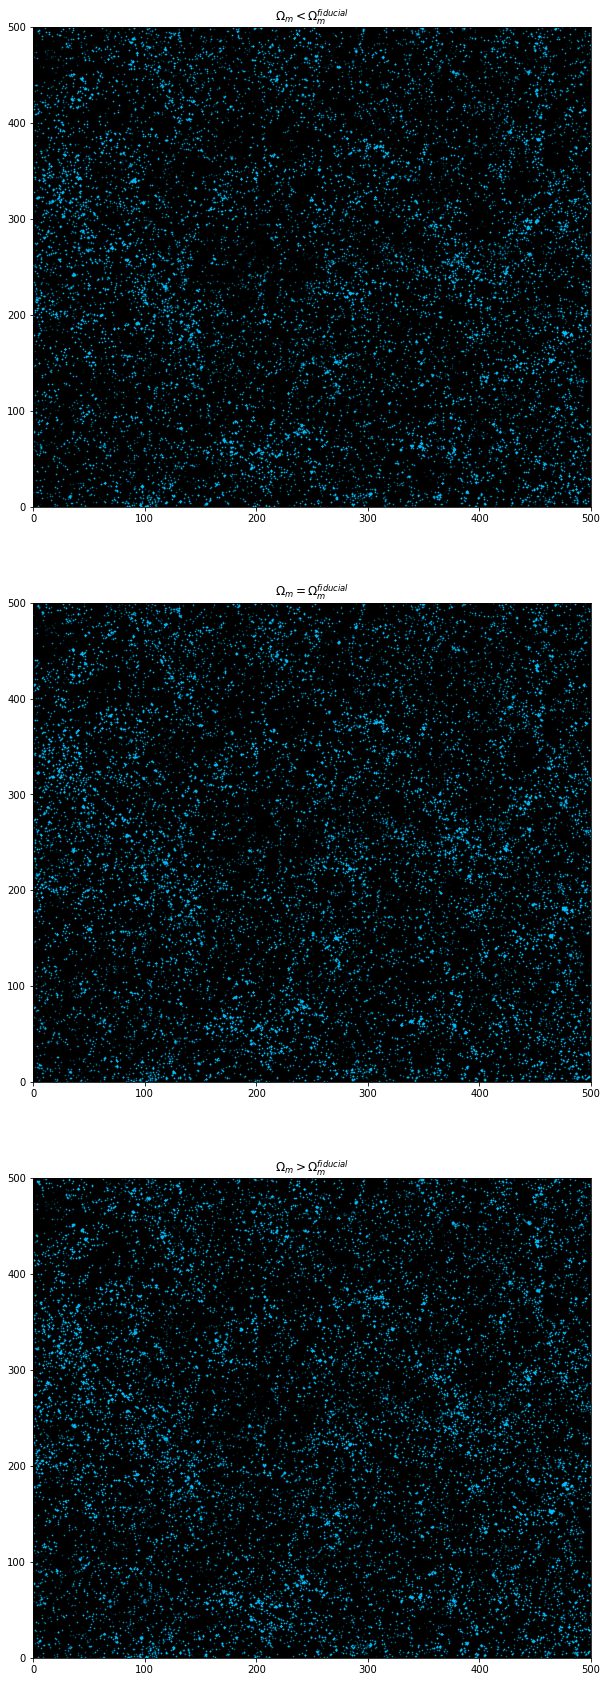

In [ ]:
# impostiamo la dimensione della simulazione e delle galassie al suo interno
gal_size = 0.7
sim_len = 500 

# carichiamo i cataloghi di galassie presi da Quijote Simulation,
# per diversi valori del parametro cosmologico Omega_m (chiedi ai nostri tutor per saperne di più)
Data_0 = h5py.File('/content/drive/My Drive/Lavoro per JN stage estivi/molino.z0.0.fiducial.nbody0.hod0.hdf5', 'r')   # !!!ATTENZIONE!!!
Data_1 = h5py.File('/content/drive/My Drive/Lavoro per JN stage estivi/molino.z0.0.Om_m.nbody0.hod0.hdf5', 'r')
Data_2 = h5py.File('/content/drive/My Drive/Lavoro per JN stage estivi/molino.z0.0.Om_p.nbody0.hod0.hdf5', 'r')  
                                                                                                                    # INSERIRE PATH CORRETTO !!!!!!!!
# carichiamo le posizione delle galassie dai cataloghi
Gal_Pos_data_0 = Data_0['pos']
Gal_Pos_data_1 = Data_1['pos'] 
Gal_Pos_data_2 = Data_2['pos']  

# impostiamo il grafico con la funzione plt.subplots che crea un oggetto ax che contiene 3 grafici, 
# pari al numero delle nostre simulazioni
fig, ax = plt.subplots(3, 1 , sharey=True, figsize=(10,30))
max_x = sim_len
max_y = sim_len
max_z = sim_len

# grafichiamo solo le galassie dentro alla regione considerata (coincidente con un cubo di lato pari alla dimensione della simulazione sim_len)
# lo facciamo per tutte e tre le simulazioni
for i in range(np.shape(Gal_Pos_data_0)[0]):
    if Gal_Pos_data_0[i,0] < max_x and Gal_Pos_data_0[i,1] < max_y and Gal_Pos_data_0[i,2] < max_z: 
        ax[1].plot(Gal_Pos_data_0[i,0], Gal_Pos_data_0[i,1], marker='o', markersize=gal_size, color='deepskyblue', alpha=1-(Gal_Pos_data_0[i,2]/max_z))

for i in range(np.shape(Gal_Pos_data_1)[0]):
    if Gal_Pos_data_1[i,0] < max_x and Gal_Pos_data_1[i,1] < max_y and Gal_Pos_data_1[i,2] < max_z: 
        ax[0].plot(Gal_Pos_data_1[i,0], Gal_Pos_data_1[i,1], marker='o', markersize=gal_size, color='deepskyblue', alpha=1-(Gal_Pos_data_1[i,2]/max_z))

for i in range(np.shape(Gal_Pos_data_2)[0]):
    if Gal_Pos_data_2[i,0] < max_x and Gal_Pos_data_2[i,1] < max_y and Gal_Pos_data_2[i,2] < max_z: 
        ax[2].plot(Gal_Pos_data_2[i,0], Gal_Pos_data_2[i,1], marker='o', markersize=gal_size, color='deepskyblue', alpha=1-(Gal_Pos_data_2[i,2]/max_z))

# visualizziamo il grafico solamente in 2D, non mostriamo l'asse z
ax[0].axis([0, max_x, 0, max_y])
ax[1].axis([0, max_x, 0, max_y])
ax[2].axis([0, max_x, 0, max_y])
ax[0].set_facecolor("black")
ax[1].set_facecolor("black")
ax[2].set_facecolor("black")
ax[0].set_title(r'$\Omega_m<\Omega_m^{fiducial}$')
ax[1].set_title(r'$\Omega_m=\Omega_m^{fiducial}$')
ax[2].set_title(r'$\Omega_m>\Omega_m^{fiducial}$')

plt.show()

La struttura su larga scala dell’Universo è composta da molteplici galassie, disposte in ammassi e filamenti.
<figure>
<center>
<img src='https://drive.google.com/uc?id=1KBt08-JC7t_VYVjRWDrkssBesv09UqZl' width="900">
</center>
</figure>

Questa immagine appare differente da quella che abbiamo graficato noi poichè abbiamo deciso di visualizzare solo le galassie (col comando Gal_Pos_data_0 = Data_0['pos']). Questa immagine, invece, mostra anche la componente di materia oscura del nostro Universo. 

Aspetta... MATERIA OSCURA???

<figure>
<center>
<img src='https://drive.google.com/uc?id=1tmQgJEsPjKOKxg5l4a08k0-6feY9E7yM' width="300">
</center>
</figure>

Eh sì, materia oscura!!! C'è una parte di materia nell'Universo che non riusciamo a vedere e non sappiamo di cosa sia fatta. Per non parlare dell'energia oscura...

Chiedi a qualche tutor per maggiori informazioni.

# Conclusione

In questo laboratorio abbiamo cercato di guidarvi nel mondo delle simulazioni a N-corpi, utilizzate dai fisici di tutto il mondo per comprendere meglio il nostro Universo. Come avete visto bastano un computer e poche righe di codice per riprodurre le interazioni gravitazionali tra i corpi dell'Universo. 

Spesso i fisici tentano di studiare l'Universo utilizzando dati raccolti grazie a diversi tipi di strumenti, come rivelatori di particelle, telescopi e satelliti. Per la costruzione di questi strumenti complicati, che costa molti soldi e molta fatica oltre che anni di lavoro, i fisici usano le simulazioni. 

Inoltre, le simulazioni permettono di ripercorrere l'evoluzione dell'Universo in poco tempo, basti pensare che in pochi minuti (per le simulazioni più semplici) o qualche mese (per alcune delle simulazioni più complesse) è possibile visualizzare quasi 14 miliardi di anni di storia del nostro misterioso Universo.

Speriamo che dopo questa esperienza possiate guardare le stelle con occhi diversi, consapevoli dell'immensità che celano e di come un buio cielo pieno di puntini gialli nasconda un mondo di complessità e mistero che affascina migliaia di ricercatori sul pianeta. Chissà, magari sarà uno di voi a metter luce su alcuni dei misteri irrisolti della fisica!!

*Vi lasciamo con un video che mostra l'evoluzione temporale delle strutture dell'Universo. Pensate, noi non siamo altro che un minuscolo puntino in questo mare vastissimo.*

In [ ]:
from IPython.display import HTML
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/UxuPZyqF9qM" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

**Se sei arrivato fin qui e hai voglia di provare un'esperienza di analisi di veri dati di cosmologia per stimare alcuni dei parametri che descrivono l'Universo, chiedi a qualche tutor: ti procureranno un altro notebook.**

Se invece ti senti pronto per mettere le mani su un vero, intero codice per fare simulazioni a N-corpi guarda qui: https://github.com/jmd-dk/concept/

Per la creazione di questa attività ci siamo ispirati a: https://medium.com/swlh/create-your-own-n-body-simulation-with-python-f417234885e9

# Soluzione esercizi

<font color='red'>**Esercizio 3 (soluzione)**</font>
L'accelerazione di gravità sulla Terra è $g=-9.81\;\text{m/s}^2$ lungo l'asse y, un corpo sulla terra percepisce una forza verso il basso $F_y=mg$.

La nostra simulazione dura 100 s, calcoliamo quanto spazio percorre il corpo, se parte da fermo (velocità nulla):

\begin{equation}
y=y_0+\frac{1}{2}\,gt^2 \quad=>\quad s = (y-y_0)_{t=100s}=\frac{1}{2}(-9.81\;\text{m/s}^2)(100\text{ s})^2=-49050\text{ m}
\end{equation}

Il corpo cade per 49 km dalla posizione iniziale, potremmo dunque impostare come posizione iniziale $x_0=5$ m e $y_0=49050$ m, cambiando il valore massimo dell'asse y a 50000. In questo modo vedremmo cadere il punto da 49 km fino a terra in esattamente 100 s.

E se fossimo su Marte? qui l'accelerazione di gravità è $g=3.72\;\text{m/s}^2$, quindi in 100 s il corpo cade per 18.6 km.
Se fossimo sulla Luna l'accelerazione varrebbe $1.62\;\text{m/s}^2$ e il corpo cadrebbe per 8.1 km. Su Giove invece per 124 km poichè la gravità è molto più forte ($g=24.79\;\text{m/s}^2$).

In alternativa possiamo cambiare il tempo di esecuzione della simulazione. Come abbiamo visto in 100 s un corpo in caduta libera percorre quasi 50km, ovvero più di sei volte l'altezza dell'Everest e circa cinque volte la quota di volo di un aereo di linea intercontinentale. Se invece restassimo più umili con un cocco che cade da una palma alta 10 m. Beh, in questo caso il frutto toccherebbe terra dopo 1.43 s:

\begin{equation}
y=y_0+\frac{1}{2}\,gt^2\quad \underset{y=0\text{ m},\,y_0=10\text{ m}}{=>}\quad t = \sqrt{-\frac{2\times10\text{ m}}{-9.81\text{ m/s}^2}}=1.43\text{ s} 
\end{equation}

Potremmo dunque impostare $x_0=5$ m, $y_0=10$ m e cambiare la durata della simulazione con il parametro frame della funzione FuncAnimation. Possiamo assegnare a frame una lista di valori di tempo appositamente costruita, ad esempio 100 valori di tempo equidistanti tra 0 a 1.5 s (possiamo farlo con il comando frames=np.linspace(0, 1.5, 100)).

<font color='red'>**Esercizio 4 (soluzione)**</font>
Prendiamo un cannone su una torre posta a $x_0=0 m$ e alta $y_0=h$, che spara verso destra con una certa velocità $v_{0x}$. Se chiamiamo l'accelerazione di gravità $g$ (che è negativa), il proiettile sarà in caduta libera lungo y:

\begin{equation}
y=h+\frac{1}{2}\,gt^2
\end{equation}

e a raggiungere il terreno ($y=0$) impiegherà:

\begin{equation}
t = \sqrt{-\frac{2h}{g}}
\end{equation}

Lungo x, invece, il proiettile si muove di moto rettilineao unifrome (non essendoci forze lungo x), e quando il corpo tocca terrà avrà percorso una certa distanza (che chiamiamo gittata):

\begin{equation}
s = v_{0x}t=v_{0x}\sqrt{-\frac{2h}{g}}
\end{equation}

Se la posizione iniziale del cannone è $x_0=0$ m e $y_0=8$ m, e utilizziamo la gravità terrestre ($g=-9.81\;\text{m/s}^2$), il proiettile impiega solo 1.3 s per toccare il terreno, ma la simulazione dura 100 s, quindi vedremmo il proiettile solo per un istante. Per visualizzare il moto meglio dobbiamo utilizzare un'accelerazione molto più bassa. Ad esempio, con $g=-0.0016\;\text{m/s}^2$ il proiettile tocca terra dopo esattamente 100 s. Se mettiamo una velocità lungo x di 0.1 m/s il proiettile avrà una gittata di 10 m.

Se invece vogliamo simulare il moto del proiettile reale sulla Terra dobbiamo cambiare i limiti degli assi. Calcoliamo quale sia l'altezza del cannone necessaria affinchè il proiettile impieghi 100 s a toccare terra (assumendo $g=-9.81\;\text{m/s}^2$):

\begin{equation}
y=h+\frac{1}{2}\,gt^2\quad\underset{y=0}{=>}\quad h = -\frac{1}{2}\,gt^2=-\frac{1}{2}(-9.81\;\text{m/s}^2)(100\text{ s})^2=49050\text{ m}
\end{equation}

A questo punto in base alla velocità possiamo calcolare la gittata. Con una velocità di 1 m/s la gittata varrà 100 m:

\begin{equation}
s = v_{0x}t = (1\text{ m/s})(100\text{ s})=100\text{ m}
\end{equation}

Impostiamo dunque i limite massimo dell'asse x a 100 e quello dell'asse y a 50000.

In alternativa possiamo cambiare il tempo della simulazione, il proiettile sulla Terra cada al suolo, partendo da 8 m, in 1.3 s. Possiamo quindi impostare frames=np.linspace(0, 1.5, 100) per lanciare la simulazione con 100 valori di tempo equidistanti tra 0 e 1.5 s. Prova a modificare la velocità lungo x per aumentare la gittata.

# Risposte domande

<font color='red'>**Risposta 1**</font> Il moto circolare unifrome è così chiamato poichè descritto da un corpo che si muove lungo una traiettoria circolare con velocità costante:

\begin{equation}
v = \frac{2\pi}{T}\,r=\omega\,r
\end{equation}

La velocità però è, in realtà un vettore, il cui modulo rimane costante ad ogni istante di tempo ma la sua direzione varia affinchè il corpo possa percorrere una traiettoria circolare. Di conseguenza, deve esistere una forza che agisce sul corpo e che ne devia la traiettoria, e quindi la direzione del vettore velocità, ad ogni istante. Questa forza è generata dall'accelerazione centripeta e punta sempre verso il centro della circonferenza:

\begin{equation}
a_c = \frac{v^2}{r} = \omega^2\,r
\end{equation}

La legge oraria può però essere scritta in modo simile a quella del moto rettilineo uniforme se anzichè le coordinate cartesiane ($x$, $y$) usiamo le coordinate polari ($r$, $\theta$):

\begin{align}
x(t) &= x_0 + r\cos\theta(t)\\
y(t) &= y_0 + r\sin\theta(t)\\
\theta(t)&=\theta_0+\omega\,t
\end{align}

<figure>
<center>
<img src='https://drive.google.com/uc?id=1lrGxndLuZT9pzNw4KN1ZE3_HsDoDc1b2' width="300">
</center>
</figure>

<font color='red'>**Risposta 2**</font> Se i pianeti fossero dotati di carica elettrica, oltre che la forza di attrazione gravitazionale, entrerebbe in gioco anche la forza elettromagnetica. Analogamente alla legge di gravitazione di Newton, la forza elettromagnetica è descritta dalla legge di Coloumb:

\begin{equation}
\mathbf{F}_\text{em}(\mathbf{r}) = -\frac{1}{4\pi\epsilon_0}\frac{q_1q_2}{r^2}\mathbf{u_r} = -\frac{1}{4\pi\epsilon_0}\frac{q_1q_2}{r^3}\mathbf{r}
\end{equation}

che stabilisce che due cariche opposte si attraggono (la forza tra i due pianeti carichi è positiva), mentre due cariche dello stesso segno si respingono (forza negativa).

Quindi se i due pianeti avessero carica elettrica la forza totale percepita tra due di loro sarebbe data dalla somma della forza gravitazionale e della forza elettrostatica:

\begin{equation}
\mathbf{F}_{1,2}(\mathbf{r}) = \mathbf{F}_\text{grav}(\mathbf{r}) + \mathbf{F}_\text{em}(\mathbf{r}) = -\left[G\frac{m_1m_2}{r^3} +\frac{1}{4\pi\epsilon_0}\frac{q_1q_2}{r^3}\right]\mathbf{r}
\end{equation}

<font color='red'>**Risposta 3**</font> Se disponiamo i nostri N-corpi in una griglia regolare, equidistanti l'uni dagli altri, la forza gravitazionale percepita dai corpi al centro della griglia è, inizialmente, nulla poichè essi percepiscono forze circa uguali da tutte le direzioni (in altri termini hanno lo stesso numero di corpi attorno in ogni direzione). I corpi esterni al contrario, percepiscono forze di attrazione gravitazionale dai corpi più interni mentre non percepiscono alcuna forza dall'esterno (dove non ci sono più corpi poichè la griglia è finita). Tenderanno dunque ad avvicinarsi verso l'interno della griglia e mano mano si uniranno ai corpi più interni fino a formare una singola struttura centrale (data dall'unione di tutti gli N corpi della griglia iniziale).

Possiamo simulare questa situazione con lo stesso codice usato per la sezione "N punti, forza gravitazionale, merging", ma disponendo manualmente le posizioni iniziali dei corpi su una griglia quadrata regolare e assegnandovi velocità nulle.

In [ ]:
# Creiamo l'insieme di figure vuote, su cui visualizzare la nostra simulazione
fig = plt.figure(figsize=(5,5))
ax = plt.subplot()

plt.close()

In [ ]:
# Definiamo la funzione che calcola l'accelerazione di ciascuna delle N particelle
def getAcc(pos):
    global mass

    N = pos.shape[0]
    a = np.zeros((N,2))

    G = 1.0     

    softening = 0.000001

    for i in range(N):
        for j in np.delete(range(N), i):
            dx = pos[j,0] - pos[i,0]
            dy = pos[j,1] - pos[i,1]
            inv_r3 = 1/np.sqrt(dx**2 + dy**2 + softening**2)**3

            a[i,0] +=  G * (dx * inv_r3) * mass[j]
            a[i,1] +=  G * (dy * inv_r3) * mass[j]
    
    return a

In [ ]:
# Definiamo la funzione di merging che unisce due particelle, se sufficientemente vicine
def merge():
    global pos
    global vel
    global acc
    global mass
    
    N = pos.shape[0]   # il numero di particelle sarà sempre dato dalla dimensione (numero di righe) della matrice delle posizioni pos
                       # questo è fondamentale perchè questo numero diminuerà ogni volta che due particelle si uniscono
    soglia_r = 0.01    # impostiamo la soglia di coalescenza, ovvero la distanza tra 2 particelle necessaria affinchè si uniscano
    
    # cicliamo su ogni coppia di particelle, calcolandone la distanza e verificando se quest'ultima sia minore della soglia di coalescenza
    # se lo è segnamo l'indice corrispondente a una delle 2 particelle che si uniscono in una lista,
    # aggiorniamo la velocità della particella superstite attraverso la conservazione della quantità di moto
    # e le assegnamo la somma delle due masse come nuova massa
    merge_indices = []
    for i in range(N):
        for j in np.arange(i+1,N,1):
            dx = pos[j,0] - pos[i,0]
            dy = pos[j,1] - pos[i,1]
            if((dx**2 + dy**2) < soglia_r):
                merge_indices.append(i)
                vel[j,:] = (mass[j]*vel[j,:] + mass[i]*vel[i,:])/(mass[j] + mass[i])
                mass[j] += mass[i] 

    # ora che abbiamo una lista con gli indici corrispondenti a tutte le particelle da eliminare (merge_indices),
    # la usiamo per eliminare posizione, velocità, accelerazione e massa di tutte queste particelle dalle relative matrici o array
    pos  = np.delete(pos, merge_indices, axis=0)
    vel  = np.delete(vel, merge_indices, axis=0)
    acc  = np.delete(acc, merge_indices, axis=0)
    mass = np.delete(mass, merge_indices, axis=0)

In [ ]:
# impostiamo l'intervallo di tempo tra un aggiornamento della posizione delle particelle e quello successivo
dt = 0.01
# decidiamo il numero di particelle che vogliamo nella simulazione
N = 100

# impostiamo le condizioni iniziali
mass = np.ones((N,1))*20.0/N  
# questa volta impostiamo le posizioni iniziali ad una griglia quadrata di punti equidistanti 
pos = np.zeros((N,2))
px = 0
py = 0

for i in range(N):
    if(px==N**0.5):
        px = 0
        py += 1
    pos[i,0] = px + 0.5
    pos[i,1] = py + 0.5
    
    px += 1

# le particelle sono ferme all'inizio
vel  = np.zeros((N,2))
acc  = np.zeros((N,2))

mass0 = mass[0] # salviamo il valore della massa iniziale delle particelle, ci servirà per riscalare la grandezza delle particelle
merge()         # chiamiamo la funzione di coalescenza, che controlla se ci sono già particelle molto vicine tra loro ed in caso affermativo le unisce
                # ovviamente non ci saranno avendole posizionate a griglia

# calcoliamo l'accelerazione iniziale delle particelle sopravvissute
acc = getAcc(pos)

In [ ]:
# Definiamo la funzione che contiene le informazioni sulla posizione delle particelle ad ogni istante di tempo;
# la posizione è aggiornata utilizzando il metodo dell'half-kick (o leapfrog)
def disegnaframe(t):
    global pos
    global vel
    global acc
    global dt
    
    # calcoliamo la posizione aggiornata dopo mezzo-passo
    vel += acc * dt/2.0
    pos += vel * dt
    
    # controlliamo se, date le nuove posizioni, ci sono particelle da unire e se si le uniamo
    merge()

    # aggiorniamo l'accelerazione delle particelle
    acc = getAcc(pos)

    # calcoliamo la velocità finale all'istante t dopo un altro mezzo-passo
    vel += acc * dt/2.0

    # come nella sezione precedente assegnamo la posizione aggiornata di ogni particella ai rispettivi oggetti grafico
    N = pos.shape[0]
    pts = []
    ax.clear()
    for i in range(N):
        pts.append(ax.plot(pos[i,0], pos[i,1], 'b.', ms=20*(mass[i]/mass0)**0.5))   # la dimensione del punto con cui viene rappresentata ciascuna particella
                                                                                    # viene riscalata con il rapporto tra la sua massa e quella iniziale
                                                                                    # massa maggiore --> dimensione maggiore
  
    # settiamo il grafico
    ax.set_xlim((0, 10))
    ax.set_ylim((0, 10))
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('Tempo = {0:4d} s'.format(t))

In [ ]:
# lanciamo la simulazione
anim = animation.FuncAnimation(fig, disegnaframe, frames=350, interval=20)

In [ ]:
# il risultato è quello che ti aspettavi?
HTML(anim.to_html5_video())

Se invece di N corpi ne avessimo infiniti allora ogni corpo percepirebbe forze identiche da ogni direzione e di conseguenza la risultante delle forze sarebbe nulla. Nessun corpo si muoverebbe!

Se però in questa ipotetica situazione spostassimo anche solo un corpo in modo che non sia più equidistante da tutti i corpi attorno ad esso creeremmo una cosìdetta perturbazione del sistema e i corpi comincerebbero a muoversi e formare strutture più grosse.

# Esercizi aggiuntivi per i temerari

<font color='red'>**La catapulta**</font> Utilizza il codice del punto in moto accelerato uniforme per simulare il lancio di una palla infuocata da una catapulta che posizioniamo nell'origine degli assi.

La catapulta sparerà verso l'altro e verso destra con un angolo da terra variabile. Che traiettoria avrà la palla infuocata? La palla toccherà mai il suolo nuovamente? 

Suggerimenti:

* usa la gravità terrestre $g=-9.81\text{ m/s}^2$
* usa velocità realistiche (da qualche decina a qualche centinaia di metri al secondo)
* imposta la durata della simulazione in base al tempo di volo della palla con frames=np.linspace(0, $t_\text{volo}$, 100), dove $t_\text{volo}$ è appunto la durata del volo
* imposta il limite massimo e minimo degli assi in base alla traiettoria della palla (se la palla arriva ad un'altezza massima di 10 m puoi mettere 11 come limite massimo dell'assey, se la gittata della palla è 25m puoi mettere 30 come limite massimo dell'asse x)

<font color='red'>**Un cerchio di corpi**</font> Prova ad utilizzare la simulazione "N punti, forza gravitazionale, merging" per simulare l'interazione gravitazionale tra N-corpi disposti equidistanti su una circonferenza. Cosa succede secondo te? E se non sono equidistanti?

Suggerimento:

* imposta le posizioni x e y sfruttando le coordinate polari:

\begin{align}
x_i &= \text{pos[i,0]} = x_0 + r\cos\theta_i\\
y_i &= \text{pos[i,1]} = y_0 + r\sin\theta_i
\end{align}

con $\theta_i$ valori equidistanti tra 0 e $2\pi$ (ad esempio puoi creare un array $\theta=\text{np.linspace}(0,2\pi,N)$)